# Auto Focus

Autofocus is implemented in all digital cameras these days. 

While using your phone camera, you may have noticed, the camera goes out of focus for a second or two, and the image looks blurry for a bit. The camera quickly performs some calculations and autofocuses to bring the subject in focus. 

In SLR cameras, autofocus is activated when we press the button half way through. You can see and hear parts of the lens moving as the camera tries to autofocus. 

Whether it is an SLR camera or your phone camera, autofocussing is done by taking a series of photos of the scene while changing the distance of the image sensor from the lens inside the camera.

In this notebook, we will find the sharpest image in a video squence of a static scene. In essence, we will do the computation necessary for autofocussing. 

# papers

How do we know if an image is sharp? What is a good measure of sharpness?

As you can imagine, an out of focus image is smooth and does not have large gradient. So some function of the gradient (first derivative) of an image should help you. 

A different measure could be based on the second order derivative of the image called the Laplacian. 

In this notebook, you to have to read one paper and a section of another paper to figure out the sharpest image in a video sequence. 

1. [Diatom autofocusing in brightheld microscopy: a comparative study](http://decsai.ugr.es/vip/files/conferences/Autofocusing2000.pdf): This paper has several measures of sharpess. 

2. [Shape from Focus](http://www1.cs.columbia.edu/CAVE/publications/pdfs/Nayar_TR89.pdf): This paper is about estimating the 3D shape of a scene using focus information. In Section 5, the author discusses a measure of focus. 

In the above papers, the focus is calculated over small windows. For our code, the focus measure needs to be calcualted over the entire image and not a small window.

In [1]:
import cv2
import matplotlib.pyplot as plt
from dataPath import DATA_PATH
import numpy as np
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
matplotlib.rcParams['image.interpolation'] = 'bilinear'

In [2]:
# Implement Variance of absolute values of Laplacian - Method 1
# Input: image
# Output: Floating point number denoting the measure of sharpness of image


def var_abs_laplacian(image):
    if len(image.shape)==3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        
    img1 = cv2.GaussianBlur(image,(3,3),0,0)
    laplacian = cv2.Laplacian(img1, cv2.CV_32F, ksize = 3, 
                            scale = 1, delta = 0)
        
    varaince= np.power(np.mean(laplacian-np.mean(laplacian)/len(laplacian)),2)
    
    return varaince

In [3]:
# Implement Sum Modified Laplacian - Method 2
# Input: image
# Output: Floating point number denoting the measure of sharpness of image




kernel_x=np.array([[0,0,0],[-1,2,-1],[0,0,0]])
kernel_y=np.array([[0,-1,0],[0,2,0],[0,-1,0]])

def sum_modified_laplacian(im):
    if len(im.shape)==3:
        im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
        
    imageX=cv2.filter2D(im,ddepth=cv2.CV_64F,kernel=kernel_x, delta=0, borderType=cv2.BORDER_DEFAULT)
    imageY=cv2.filter2D(im,ddepth=cv2.CV_64F,kernel=kernel_y, delta=0, borderType=cv2.BORDER_DEFAULT)
    SML=np.sum(abs(imageX)+abs(imageY))
    return SML



Total number of frames : 186
Frame ID of the best frame [Method 1]: 1
Frame ID of the best frame [Method 2]: 1
Frame ID of the best frame [Method 2]: 3
Frame ID of the best frame [Method 1]: 4
Frame ID of the best frame [Method 1]: 5
Frame ID of the best frame [Method 1]: 9
Frame ID of the best frame [Method 2]: 9
Frame ID of the best frame [Method 2]: 13
Frame ID of the best frame [Method 1]: 16
Frame ID of the best frame [Method 1]: 29
Frame ID of the best frame [Method 1]: 39
Frame ID of the best frame [Method 1]: 40
Frame ID of the best frame [Method 2]: 57
Frame ID of the best frame [Method 2]: 61
Frame ID of the best frame [Method 2]: 65
Frame ID of the best frame [Method 1]: 69
Frame ID of the best frame [Method 2]: 69
Frame ID of the best frame [Method 1]: 72
Frame ID of the best frame [Method 2]: 73
Frame ID of the best frame [Method 2]: 75
Frame ID of the best frame [Method 2]: 79
Frame ID of the best frame [Method 2]: 82
Frame ID of the best frame [Method 2]: 83
Frame ID of 

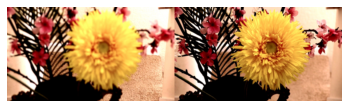

In [4]:
# Read input video filename
filename = 'focus-test.mp4'

# Create a VideoCapture object
cap = cv2.VideoCapture(filename)

# Read first frame from the video
ret, frame = cap.read()

# Display total number of frames in the video
print("Total number of frames : {}".format(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))))

maxV1 = 0
maxV2 = 0

# Frame with maximum measure of focus
# Obtained using methods 1 and 2
bestFrame1 = 0 
bestFrame2 = 0 

# Frame ID of frame with maximum measure
# of focus
# Obtained using methods 1 and 2
bestFrameId1 = 0 
bestFrameId2 = 0 

# Get measures of focus from both methods
val1 = var_abs_laplacian(frame)
val2 = sum_modified_laplacian(frame)

# Specify the ROI for flower in the frame
# UPDATE THE VALUES BELOW
top = 0
left = 0
bottom = frame.shape[0]
right = frame.shape[1]

# Iterate over all the frames present in the video
while(ret):
    # Crop the flower region out of the frame
    flower = frame[top:bottom, left:right]
    # Get measures of focus from both methods
    val1 = var_abs_laplacian(frame)
    val2 = sum_modified_laplacian(frame)
    
    # If the current measure of focus is greater 
    # than the current maximum
    if val1 > maxV1 :
        # Revise the current maximum
        maxV1 = val1
        # Get frame ID of the new best frame
        bestFrameId1 = int(cap.get(cv2.CAP_PROP_POS_FRAMES))
        # Revise the new best frame
        bestFrame1 = frame.copy()
        print("Frame ID of the best frame [Method 1]: {}".format(bestFrameId1))

    # If the current measure of focus is greater 
    # than the current maximum
    if val2 > maxV2 : 
        # Revise the current maximum
        maxV2 = val2
        # Get frame ID of the new best frame
        bestFrameId2 = int(cap.get(cv2.CAP_PROP_POS_FRAMES))
        # Revise the new best frame
        bestFrame2 = frame.copy()
        print("Frame ID of the best frame [Method 2]: {}".format(bestFrameId2))
        
    # Read a new frame
    ret, frame = cap.read()


print("================================================")
# Print the Frame ID of the best frame
print("Frame ID of the best frame [Method 1]: {}".format(bestFrameId1))
print("Frame ID of the best frame [Method 2]: {}".format(bestFrameId2))

# Release the VideoCapture object
cap.release()

# Stack the best frames obtained using both methods
out = np.hstack((bestFrame1, bestFrame2))

# Display the stacked frames
plt.figure()
plt.imshow(out[:,:,::-1]);
plt.axis('off');